# Homework Three

## Problem Two 

In [22]:
#Imports 
import numpy as np
from matplotlib import pyplot as plt
import math
import rebound

## Part A

- You may recall seeing articles about the ESA Rosetta mission that visited and then sent a probe to land on a comet. This was eponymously named 67P/Churyumov–Gerasimenko comet (see https://en.wikipedia.org/wiki/67P/ChuryumovGerasimenko). There is an example problem based on this comet, which we will use to get familiar with Rebound.

- Set up and run the 67P/C-G example problem following the documentation (see Examples→Planetary systems →Just getting started →The comet 67P/Churyumov-Gerasimenko). Only include the Sun, Saturn and Jupiter for now. Include a plot of the 67P/C-G comet and two planet orbits evolved over 70 years in your solution set.

In [23]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("NAME=Churyumov-Gerasimenko; CAP", m=5.03e-18)

sim.dt = -0.01

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,-70.*year, Noutputs)
x = np.zeros((4, Noutputs))
y = np.zeros((4, Noutputs))
z = np.zeros((4, Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[1].x
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z
    x[2][i] = ps[2].x
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z
    x[3][i] = ps[3].x
    y[3][i] = ps[3].y
    z[3][i] = ps[3].z

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


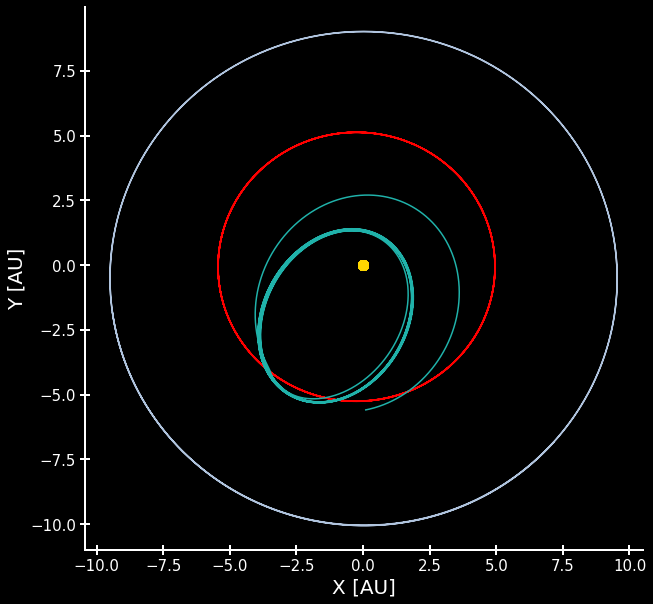

In [24]:
fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Jupiter')
plt.plot(x[2], y[2], color = "lightsteelblue", label = 'Saturn')
plt.plot(x[3], y[3], color = "lightseagreen", label = 'Comet')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X [AU]'  , size = '20', color = "white")
plt.ylabel(r'Y [AU]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

## Part B

- The code offers a variety of different choices of integrators. Make a table of the different options, list their order of accuracy (if documented), what problems they are best suited for, and note any tunable parameters.

In [42]:
def part_b(time, typ):
    sim = rebound.Simulation()
    sim.add("Sun")
    sim.add("Jupiter")
    sim.add("Saturn")
    sim.add("NAME=Churyumov-Gerasimenko; CAP", m=5.03e-18)

    sim.dt = -time

    Noutputs = 10000
    year = 2.*np.pi # One year in units where G=1
    times = np.linspace(0.,-70.*year, Noutputs)
    x = np.zeros((4, Noutputs))
    y = np.zeros((4, Noutputs))
    z = np.zeros((4, Noutputs))

    sim.integrator = typ # IAS15 is the default integrator, so we actually don't need this line
    sim.move_to_com()        # We always move to the center of momentum frame before an integration
    ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
    
    energy = sim.calculate_energy()

    for i,time in enumerate(times):
        sim.integrate(time)
        x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
        y[0][i] = ps[0].y
        z[0][i] = ps[0].z
        x[1][i] = ps[1].x
        y[1][i] = ps[1].y
        z[1][i] = ps[1].z
        x[2][i] = ps[2].x
        y[2][i] = ps[2].y
        z[2][i] = ps[2].z
        x[3][i] = ps[3].x
        y[3][i] = ps[3].y
        z[3][i] = ps[3].z
        
        
    return x, y, z, energy 

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


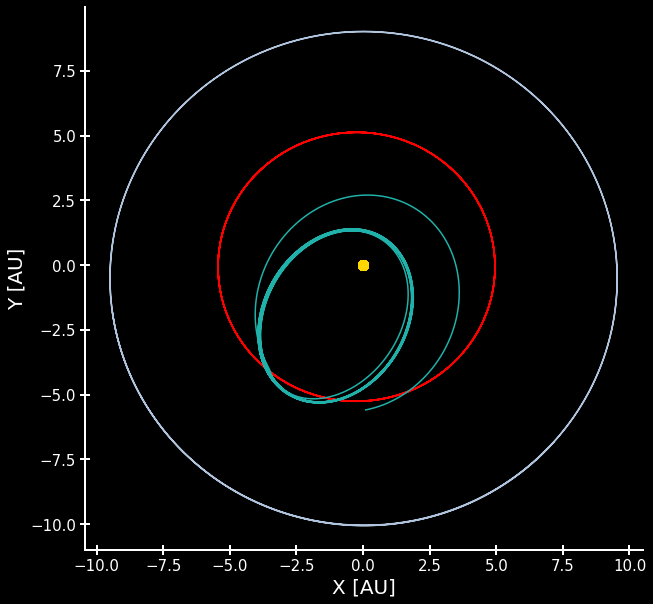

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Energy = -0.0001067556776986595


In [43]:
x = part_b(0.01, "WHFast")[0]
y = part_b(0.01, "WHFast")[1]

fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Jupiter')
plt.plot(x[2], y[2], color = "lightsteelblue", label = 'Saturn')
plt.plot(x[3], y[3], color = "lightseagreen", label = 'Comet')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X [AU]'  , size = '20', color = "white")
plt.ylabel(r'Y [AU]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

print("Energy = " +str(part_b(0.01, "WHFast")[3]))

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


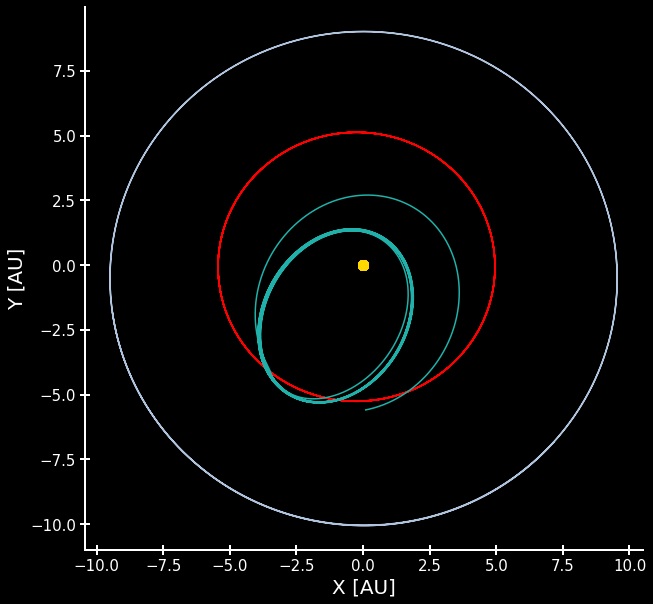

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Energy = -0.0001067556776986595


In [48]:
x = part_b(0.01, "EOS")[0]
y = part_b(0.01, "EOS")[1]

fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Jupiter')
plt.plot(x[2], y[2], color = "lightsteelblue", label = 'Saturn')
plt.plot(x[3], y[3], color = "lightseagreen", label = 'Comet')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X [AU]'  , size = '20', color = "white")
plt.ylabel(r'Y [AU]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

print("Energy = " +str(part_b(0.01, "EOS")[3]))

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


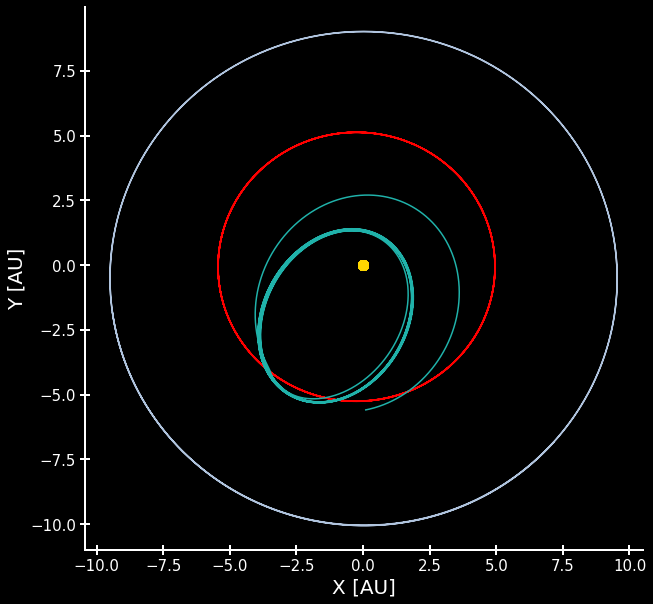

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Energy = -0.0001067556776986595


In [45]:
x = part_b(0.0001, "IAS15")[0]
y = part_b(0.0001, "IAS15")[1]

fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Jupiter')
plt.plot(x[2], y[2], color = "lightsteelblue", label = 'Saturn')
plt.plot(x[3], y[3], color = "lightseagreen", label = 'Comet')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X [AU]'  , size = '20', color = "white")
plt.ylabel(r'Y [AU]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

print("Energy = " +str(part_b(0.0001, "IAS15")[3]))

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


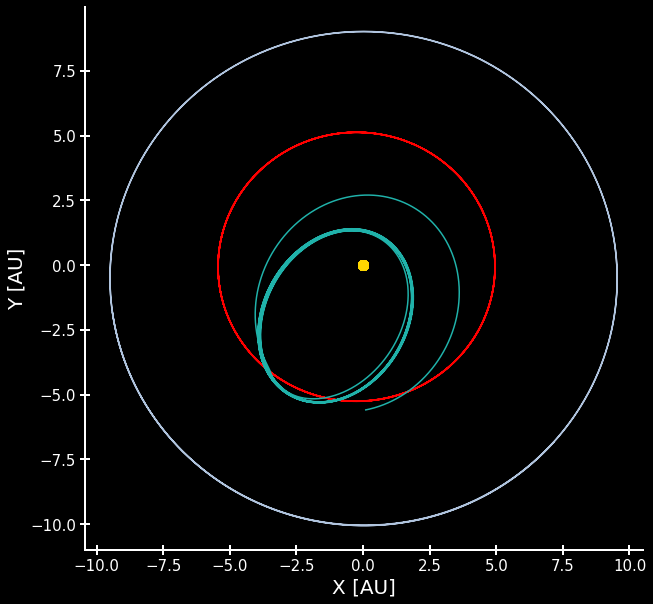

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 
Energy = -0.0001067556776986595


In [46]:
x = part_b(100, "IAS15")[0]
y = part_b(100, "IAS15")[1]

fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Jupiter')
plt.plot(x[2], y[2], color = "lightsteelblue", label = 'Saturn')
plt.plot(x[3], y[3], color = "lightseagreen", label = 'Comet')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X [AU]'  , size = '20', color = "white")
plt.ylabel(r'Y [AU]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

print("Energy = " +str(part_b(100, "IAS15")[3]))

From these results it doesn't seem like the type of integrator or the time step matter much to the simulation (nothing looks different and the energies are basically the same). I think this makes sense baised off of what we learned in problem one with how the integrators work.

## Part C

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'NAME=Churyumov-Gerasimenko; CAP'... 
Found: 67P/Churyumov-Gerasimenko 


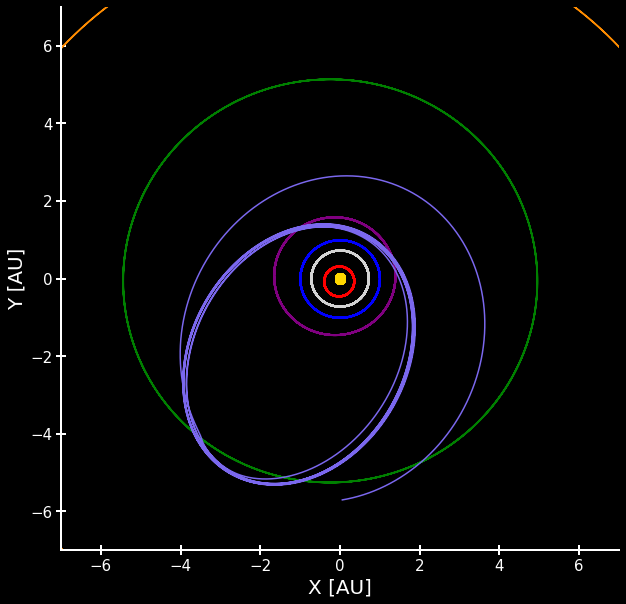

-0.00011228290043049887


In [50]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Mercury")
sim.add("Venus")
sim.add("Earth")
sim.add("Mars")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Uranus")
sim.add("Neptune")

sim.add("NAME=Churyumov-Gerasimenko; CAP", m=5.03e-18)

sim.dt = -0.01

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,-70.*year, Noutputs)
x = np.zeros((10,Noutputs))
y = np.zeros((10,Noutputs))
z = np.zeros((10,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

energy = sim.calculate_energy()

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[1].x
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z
    x[2][i] = ps[2].x
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z
    x[3][i] = ps[3].x
    y[3][i] = ps[3].y
    z[3][i] = ps[3].z
    x[4][i] = ps[4].x
    y[4][i] = ps[4].y
    z[4][i] = ps[4].z
    x[5][i] = ps[5].x
    y[5][i] = ps[5].y
    z[5][i] = ps[5].z
    x[6][i] = ps[6].x
    y[6][i] = ps[6].y
    z[6][i] = ps[6].z
    x[7][i] = ps[7].x
    y[7][i] = ps[7].y
    z[7][i] = ps[7].z
    x[8][i] = ps[8].x
    y[8][i] = ps[8].y
    z[8][i] = ps[8].z
    x[9][i] = ps[9].x
    y[9][i] = ps[9].y
    z[9][i] = ps[9].z
    


fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Mercury')
plt.plot(x[2], y[2], color = "lightgrey", label = 'Venus')
plt.plot(x[3], y[3], color = "blue", label = 'Earth')
plt.plot(x[4], y[4], color = "purple", label = 'Mars')
plt.plot(x[5], y[5], color = "green", label = 'Jupiter')
plt.plot(x[6], y[6], color = "darkorange", label = 'Saturn')
plt.plot(x[7], y[7], color = "pink", label = 'Uranus')
plt.plot(x[8], y[8], color = "grey", label = 'Neptune')
plt.plot(x[9], y[9], color = "mediumslateblue", label = 'Comet')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X [AU]'  , size = '20', color = "white")
plt.ylabel(r'Y [AU]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.xlim(-7,7)
plt.ylim(-7,7)

plt.show()

print(energy)

From these results it seems like the biggest change in the comet's orbit comes from changing the bodies involved. Missing bodies had a big impact of the orbit. 

## Part D

- Optional: If you completed part 3a in HW 1 or have your own N-body code that you wrote, you might be curious about how your Earth orbit integration compares with one run with Rebound. Compare the Rebound Sun/Earth orbit with your result from HW1 (or your own code). What do you notice?

## Problem 3

- There is a long history of speculation that another undiscovered planet might exist outside our Solar system. Originally this planet was known as “Planet X.” A more recent 2016 study has hypothesized anew about the presence of a large planet beyond the Kuiper belt (now called “Planet nine”). You can read through a brief summary of the proposed planet here: https://en.wikipedia.org/wiki/Planet_Nine.

- Set up a Solar System with all the planets and Pluto. Suppose Planet Nine has a semi-major axis of 460 au and eccentricity of 0.4. How massive would it need to be to perturb Pluto’s orbit by 10% after 10 years of evolution? Given your answer, why do you think we haven’t found any Planet Nine yet?

In [51]:
def mass_dep(mass):
    
    import rebound

    sim = rebound.Simulation()

    sim.add("Sun")
    sim.add("Mercury")
    sim.add("Venus")
    sim.add("Earth")
    sim.add("Mars")
    sim.add("Jupiter")
    sim.add("Saturn")
    sim.add("Uranus")
    sim.add("Neptune")
    sim.add("Pluto")
    
    sim.move_to_hel()        # We always move to the center of momentum frame before an integration
                                #Use the sun as the centering point
    sim.add(m = mass, a = 460, e = 0.4)

    sim.dt = -0.01

    Noutputs = 10000
    year = 2.*np.pi # One year in units where G=1
    times = np.linspace(0.,-10.*year, Noutputs)
    x = np.zeros((11,Noutputs))
    y = np.zeros((11,Noutputs))
    z = np.zeros((11,Noutputs))

    sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
    ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

    for i,time in enumerate(times):
        sim.integrate(time)
        x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
        y[0][i] = ps[0].y
        z[0][i] = ps[0].z
        x[1][i] = ps[1].x
        y[1][i] = ps[1].y
        z[1][i] = ps[1].z
        x[2][i] = ps[2].x
        y[2][i] = ps[2].y
        z[2][i] = ps[2].z
        x[3][i] = ps[3].x
        y[3][i] = ps[3].y
        z[3][i] = ps[3].z
        x[4][i] = ps[4].x
        y[4][i] = ps[4].y
        z[4][i] = ps[4].z
        x[5][i] = ps[5].x
        y[5][i] = ps[5].y
        z[5][i] = ps[5].z
        x[6][i] = ps[6].x
        y[6][i] = ps[6].y
        z[6][i] = ps[6].z
        x[7][i] = ps[7].x
        y[7][i] = ps[7].y
        z[7][i] = ps[7].z
        x[8][i] = ps[8].x
        y[8][i] = ps[8].y
        z[8][i] = ps[8].z
        x[9][i] = ps[9].x
        y[9][i] = ps[9].y
        z[9][i] = ps[9].z
        x[10][i] = ps[10].x
        y[10][i] = ps[10].y
        z[10][i] = ps[10].z
        
    return x, y, z, sim.calculate_orbits()[8].a

In [53]:
J = np.arange(0, 120, 1)
difference = 0

for i in J:
    print(i)
    axis = mass_dep(i)[3]
    difference = (abs(39.489 - axis) / ((39.489 + axis) / 2)) * 100
    
    if difference > 10.0:
        
        print("mass = " +str(i))
        print("Semi-major axis = " +str(axis))
        print("Percent Difference = " +str(difference))
        break
    

0
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
1
Searching NASA Horizons for 'Sun'... 
Found: Su

From our calculations we would have to have a vary large "planet" at this orbital radius to be able to see a change in Pluto's orbit. For a 10% change (given this situation) we would need an object that has a mass of about 101 solar masses. Planets can't get this big and anything around a reasonable planet size doesn't show a noticable change in the orbit. This is probably why it would be extremly hard to find baised off of orbits and I'm sure other methods are not great either.  

## Just to see what this looks like


In [56]:
mass = 101

sim = rebound.Simulation()

sim.add("Sun")
sim.add("Mercury")
sim.add("Venus")
sim.add("Earth")
sim.add("Mars")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Uranus")
sim.add("Neptune")
sim.add("Pluto")
    
sim.move_to_hel()        # We always move to the center of momentum frame before an integration
                            #We want to center on the sun

sim.add(m = mass, a = 460, e = 0.4)

sim.dt = -0.01

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,10.*year, Noutputs)
x = np.zeros((11,Noutputs))
y = np.zeros((11,Noutputs))
z = np.zeros((11,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[1].x
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z
    x[2][i] = ps[2].x
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z
    x[3][i] = ps[3].x
    y[3][i] = ps[3].y
    z[3][i] = ps[3].z
    x[4][i] = ps[4].x
    y[4][i] = ps[4].y
    z[4][i] = ps[4].z
    x[5][i] = ps[5].x
    y[5][i] = ps[5].y
    z[5][i] = ps[5].z
    x[6][i] = ps[6].x
    y[6][i] = ps[6].y
    z[6][i] = ps[6].z
    x[7][i] = ps[7].x
    y[7][i] = ps[7].y
    z[7][i] = ps[7].z
    x[8][i] = ps[8].x
    y[8][i] = ps[8].y
    z[8][i] = ps[8].z
    x[9][i] = ps[9].x
    y[9][i] = ps[9].y
    z[9][i] = ps[9].z
    x[10][i] = ps[10].x
    y[10][i] = ps[10].y
    z[10][i] = ps[10].z
        
Semi_Major = sim.calculate_orbits()[8].a

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')


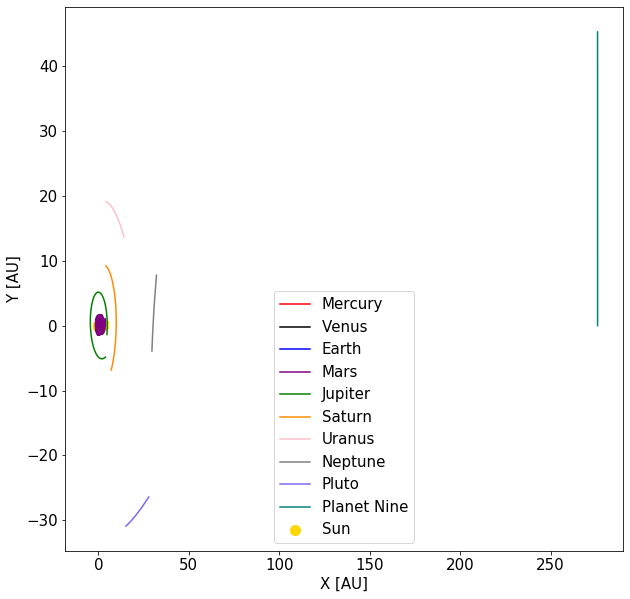

In [57]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.scatter(x[0], y[0], color = "gold", label = "Sun", s = 100)
plt.plot(x[1], y[1], color = "red", label = 'Mercury')
plt.plot(x[2], y[2], color = "black", label = 'Venus')
plt.plot(x[3], y[3], color = "blue", label = 'Earth')
plt.plot(x[4], y[4], color = "purple", label = 'Mars')
plt.plot(x[5], y[5], color = "green", label = 'Jupiter')
plt.plot(x[6], y[6], color = "darkorange", label = 'Saturn')
plt.plot(x[7], y[7], color = "pink", label = 'Uranus')
plt.plot(x[8], y[8], color = "grey", label = 'Neptune')
plt.plot(x[9], y[9], color = "mediumslateblue", label = 'Pluto')
plt.plot(x[10], y[10], color = "teal", label = 'Planet Nine')


plt.legend()

plt.xlabel("X [AU]")
plt.ylabel("Y [AU]")
#plt.xlim(500,500)
#plt.ylim(-500,500)
#plt.xlim(-8,8)
#plt.ylim(-2.5,2.5)

plt.show()